In [17]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

In [18]:
df = pd.read_csv('C:/취업준비/스파르타코딩/머신러닝(주피터노트북)/TeamPJT-3/train_test.csv')
type(df['timestamp'][0])
import datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['ttimestampp'] = df['year']+df['month']
df['Index'] = df.index

df

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
0,TG_A_J_20220228,2022-02-28,TG,A,J,5980.0,3608,2022,2,28,0,2024,0
1,TG_A_S_20220228,2022-02-28,TG,A,S,26209.0,3965,2022,2,28,0,2024,1
2,TG_B_J_20220228,2022-02-28,TG,B,J,5829.0,4000,2022,2,28,0,2024,2
3,TG_B_S_20220228,2022-02-28,TG,B,S,16060.0,4257,2022,2,28,0,2024,3
4,TG_C_J_20220228,2022-02-28,TG,C,J,2224.0,3987,2022,2,28,0,2024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,BC_D_J_20220201,2022-02-01,BC,D,J,0.0,0,2022,2,1,1,2024,1087
1088,BC_E_J_20220201,2022-02-01,BC,E,J,0.0,0,2022,2,1,1,2024,1088
1089,BC_E_S_20220201,2022-02-01,BC,E,S,0.0,0,2022,2,1,1,2024,1089
1090,CB_F_J_20220201,2022-02-01,CB,F,J,0.0,0,2022,2,1,1,2024,1090


In [19]:
CB_data = df[df['item'] == 'CB']
CB_data

,ID,timestamp,item,corporation,location,supply(kg),price(??kg),year,month,day,dayofweek,ttimestampp,Index
17,CB_A_J_20220228,2022-02-28,CB,A,J,650.0,1415,2022,2,28,0,2024,17
18,CB_A_S_20220228,2022-02-28,CB,A,S,0.0,0,2022,2,28,0,2024,18
19,CB_D_J_20220228,2022-02-28,CB,D,J,0.0,0,2022,2,28,0,2024,19
20,CB_E_J_20220228,2022-02-28,CB,E,J,300.0,1000,2022,2,28,0,2024,20
37,CB_F_J_20220228,2022-02-28,CB,F,J,56920.0,803,2022,2,28,0,2024,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,CB_A_J_20220201,2022-02-01,CB,A,J,0.0,0,2022,2,1,1,2024,1070
1071,CB_A_S_20220201,2022-02-01,CB,A,S,0.0,0,2022,2,1,1,2024,1071
1072,CB_D_J_20220201,2022-02-01,CB,D,J,0.0,0,2022,2,1,1,2024,1072
1073,CB_E_J_20220201,2022-02-01,CB,E,J,0.0,0,2022,2,1,1,2024,1073


<Axes: xlabel='supply(kg)', ylabel='price(??kg)'>

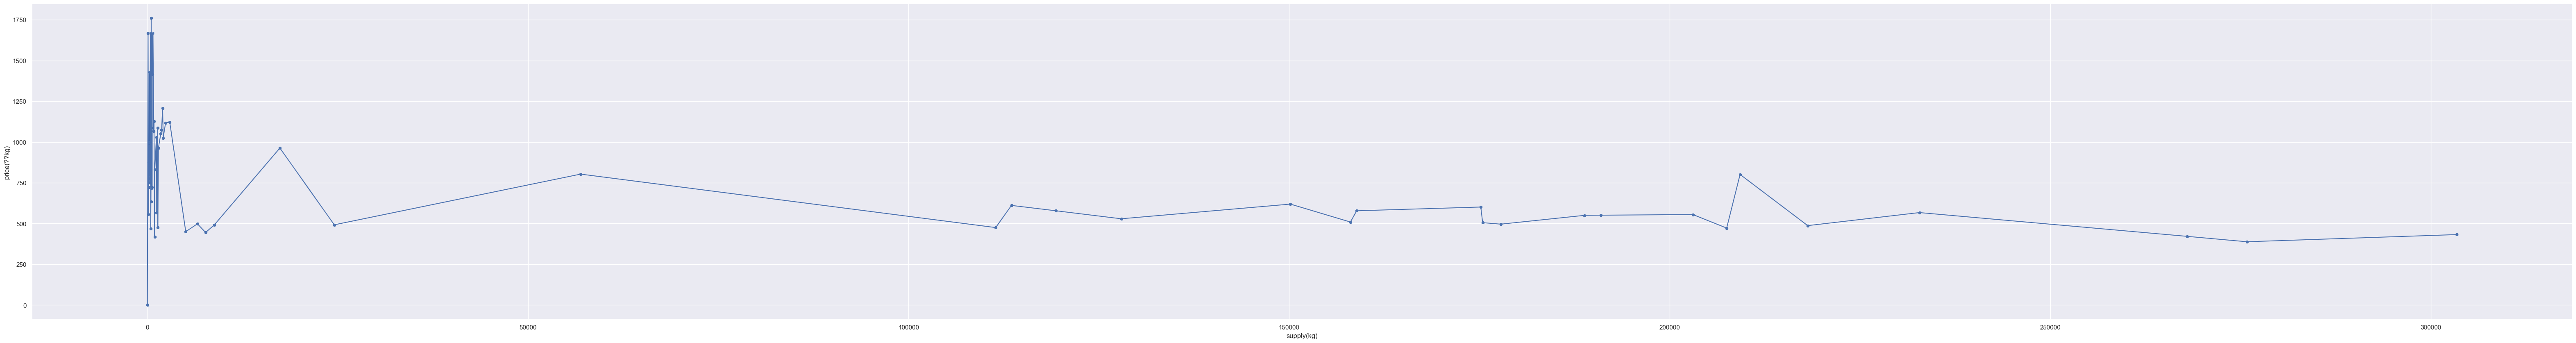

In [20]:
#CB_data.plot()
plt.show()
sns.scatterplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
#plt.figure(figsize=(40,20))

0.0009367135232082333 352.65700131280045
352.6579380263237


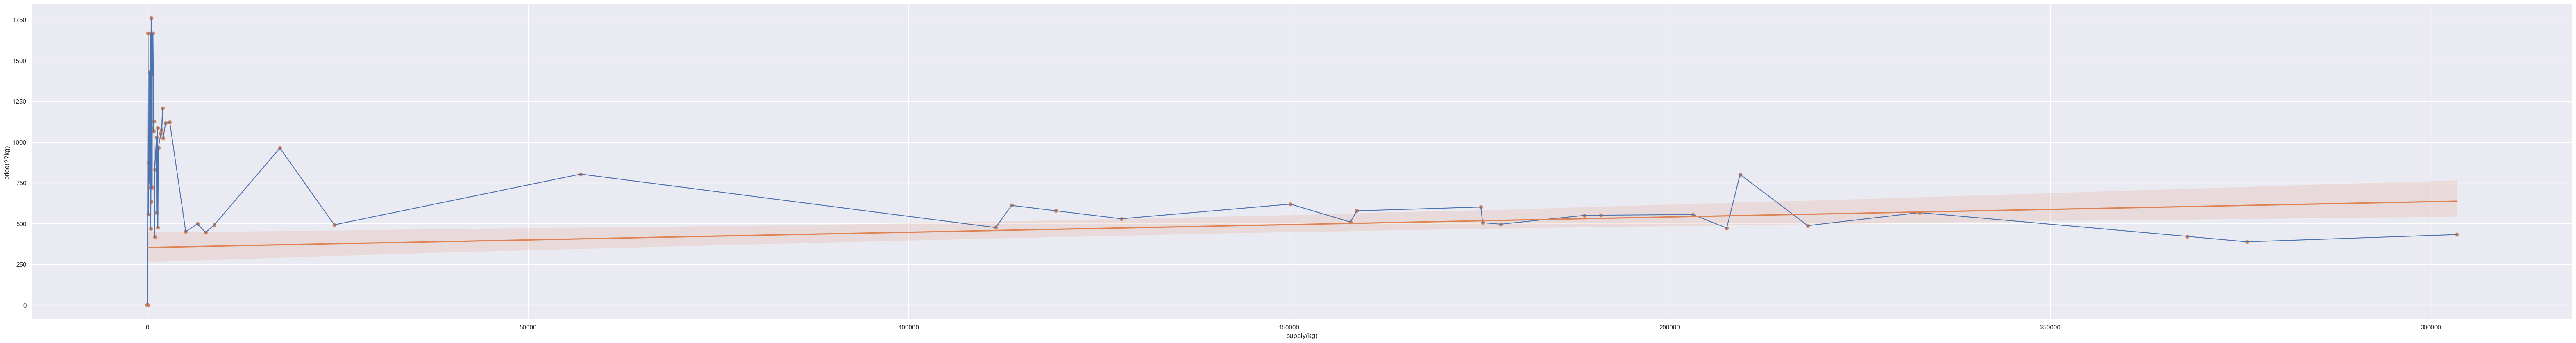

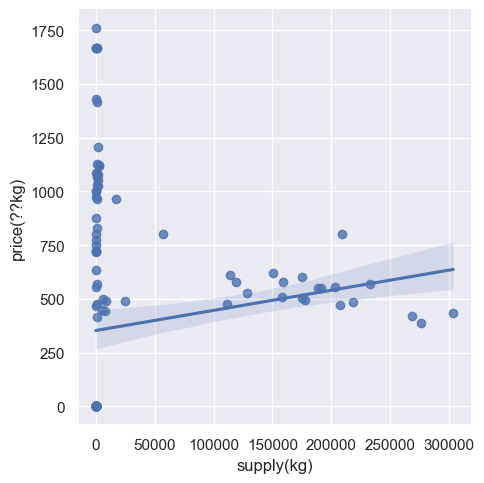

In [21]:
sns.set(rc={"figure.figsize":(80, 10)}) #width=3, #height=4
sns.scatterplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lineplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.regplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
sns.lmplot( data = CB_data, x = 'supply(kg)' , y = 'price(??kg)')
z=np.polyfit(CB_data['supply(kg)'], CB_data['price(??kg)'], 1)
f=np.poly1d(z)
print(z[0], z[1])
print(f(1))

In [22]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)


sklearn.linear_model._base.LinearRegression

In [23]:
prsu_df = CB_data[['supply(kg)', 'price(??kg)']]
model_lr.fit(CB_data[['supply(kg)']], CB_data['price(??kg)'])


LinearRegression()

In [24]:
y_pred = model_lr.predict(CB_data[['supply(kg)']])


In [25]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(CB_data['price(??kg)'], y_pred)


394.23476625721077

In [26]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(CB_data['price(??kg)'], y_pred)

231556.0133371202

In [27]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(CB_data['price(??kg)'], y_pred) 

In [28]:
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(CB_data['price(??kg)'], y_pred) 
MSE ** 0.5

481.2026738673843

In [29]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(CB_data['price(??kg)'], y_pred)

19.016248443619297

In [30]:
print(model_lr.intercept_)
r2_score(CB_data['price(??kg)'], y_pred)

352.65700131280056


0.017499644864963027